In [48]:
import os
import glob
import gzip
import operator
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib

%matplotlib inline

In [30]:
MODELS_DIR = './models/'
PATH_INFO_FILENAME = MODELS_DIR + 'path_info.csv'
RESULTS_DIR = './out/'
RESULTS_FILENAME = RESULTS_DIR + 'results.csv'
KNN_FILENAME = RESULTS_DIR + 'results-ball-tree-1-nn-4000-eps-1.knn.gz'

In [167]:
colors_palette = [
                    '#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A040A0',  # Poison
                    '#A8A878',  # Normal
                    '#A8B820',  # Bug
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8'   # Dragon
                   ]

colors_palette = sns.color_palette("Paired", 10)
colors_palette = sns.color_palette("Set3", 10)

# $\epsilon$-transformation information

In [168]:
path_info = pd.read_csv(PATH_INFO_FILENAME)

In [169]:
path_info

,class,n_paths
0,0,20370
1,1,13467
2,2,39640
3,3,45570
4,4,36534
5,5,44583
6,6,28231
7,7,29999
8,8,46313
9,9,41540


In [170]:
print("Total number of epsilon-transformations extracted/indexed: {}".format(path_info.n_paths.sum()))

Total number of epsilon-transformations extracted/indexed: 346247


# Plot $\epsilon$-transformations distribution over class labels

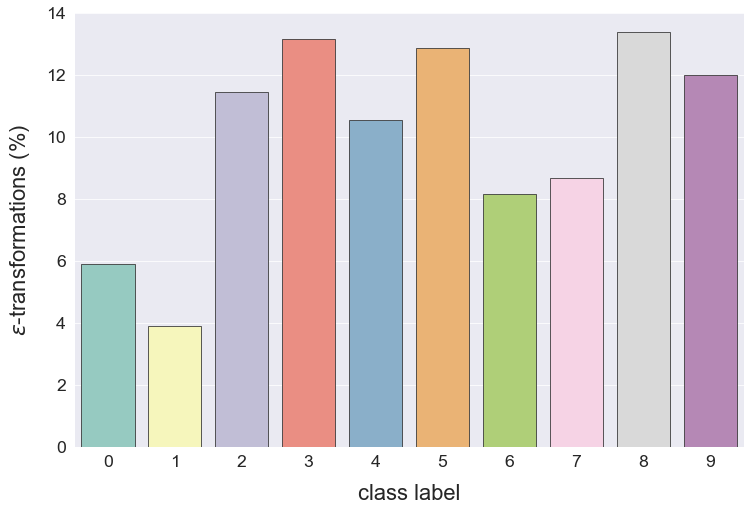

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
# Plot using seaborn
sns.set("paper", font_scale = 2)
ax = sns.barplot(x="class", 
                 y=(path_info.n_paths * 100)/(path_info.n_paths.sum()), 
                 data=path_info, 
                 palette=colors_palette[:10],
                 edgecolor=".2"
                )
_ = ax.set_xlabel('class label', fontsize=22, labelpad=14)
_ = ax.set_ylabel(r'$\epsilon$-transformations (%)', fontsize=22, labelpad=14)
#_ = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Best $\epsilon$-transformations

In [151]:
knn_files = glob.glob(KNN_FILENAME)

In [152]:
knn_files

['./out/results-ball-tree-1-nn-4000-eps-1.knn.gz']

In [153]:
np.all([os.path.isfile(f) for f in knn_files])

True

In [154]:
def load_knn(knn_filename):
    with open(knn_filename, 'rb') as knn_file:
        return joblib.load(knn_file)

In [155]:
def freq_knn(knn_res):
    freq = {}
    for key in knn_res:
        iid, label = key
        transf = knn_res[key]
        sorted_transf = sorted(transf.items(), key=operator.itemgetter(1))
        freq.setdefault(label, []).append(sorted_transf[0][0])

    return freq

In [156]:
all_freqs = {}
for kf in knn_files:
    key = "-".join(kf.split('results-')[1].split('-')[:2])
    print(key)
    all_freqs[key] = freq_knn(load_knn(kf))

ball-tree


In [157]:
for label in sorted(all_freqs['ball-tree']):
    print("Most frequent target for original class {} = {}".format(label, statistics.mode(all_freqs['ball-tree'][label])))
    
    

Most frequent target for original class 0 = 7
Most frequent target for original class 1 = 7
Most frequent target for original class 2 = 1
Most frequent target for original class 3 = 1
Most frequent target for original class 4 = 9
Most frequent target for original class 5 = 9
Most frequent target for original class 6 = 1
Most frequent target for original class 7 = 9
Most frequent target for original class 8 = 1
Most frequent target for original class 9 = 1


In [158]:
data = pd.DataFrame([(key, var) for (key, L) in all_freqs['ball-tree'].items() for var in L], columns=['origin_label', 'target_label'])


In [159]:
data.head()

,origin_label,target_label
0,4,5
1,4,7
2,4,3
3,4,9
4,4,5


In [173]:
def plot_hist(data, ax, origin_label, color):
    # Plot using seaborn
    sns.set("paper", font_scale = 2)
    sns.distplot(data[data['origin_label'] == origin_label]['target_label'], 
                 ax=ax, 
                 kde=True, 
                 bins=np.arange(11) - 0.5,
                 hist_kws=dict(edgecolor="k", linewidth=1),
                 color=color
                )
    _ = ax.set_xlim(-0.5,9.5)
    _ = ax.set_xticks(range(10))
    _ = ax.set_xlabel('target class label = {}'.format(origin_label), fontsize=16, labelpad=10)
    _ = ax.set_ylabel('density', fontsize=18, labelpad=10)

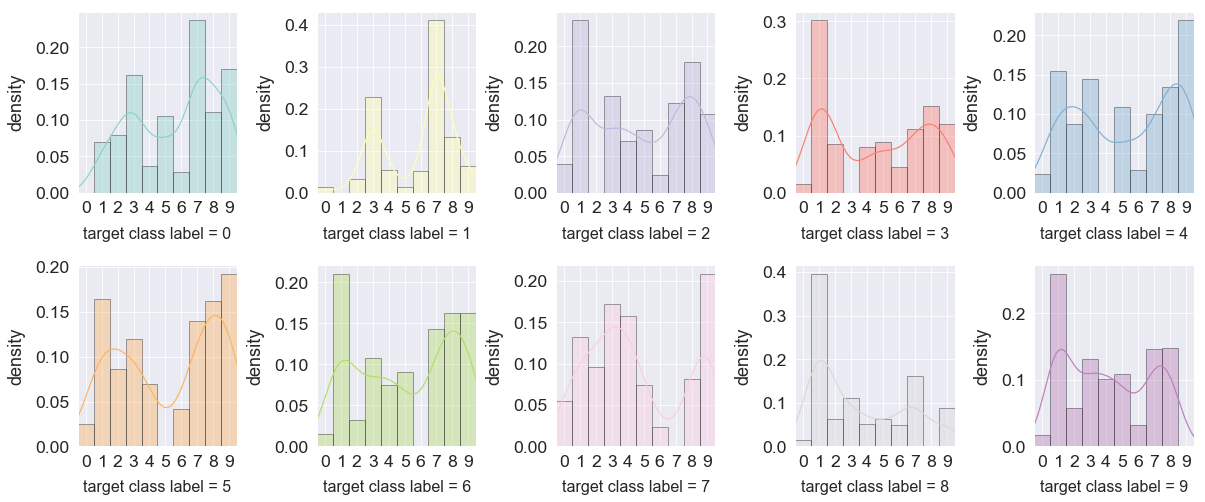

In [174]:
fig, ax = plt.subplots(2, 5, figsize=(20,8))
i = 0
fig.subplots_adjust(hspace=0.4, wspace=0.5)
for k in sorted(all_freqs['ball-tree']):
    plot_hist(data, ax[i//5][i%5], k, colors_palette[k])
    i += 1

In [ ]:
results = pd.read_csv(RESULTS_FILENAME)

In [ ]:
results.head()

In [ ]:
data = results.sort_values(by=['method', 'k_nn', 'n_samples', 'epsilon'])

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
def plot(data, epsilon, k):
    data_to_plot = data
    #data_to_plot = data[(data['epsilon'] == epsilon)]
    #data_to_plot = data[(data['epsilon'] == epsilon) & (data['k_nn'] == k)]
    fig, ax = plt.subplots(1, 1, figsize=(12,8))

    # Plot using seaborn
    sns.set(font_scale = 1.6)
    ax = sns.lineplot(x='n_samples', 
                      y='elapsed_time (secs.)', 
                      hue='method', 
                      markers=True, 
                      data=data_to_plot, 
                      style='method',
                      palette=[colors_palette[9], colors_palette[0], colors_palette[2]],
                      hue_order = ['brute-force', 'kd-tree', 'ball-tree']
                     )

    #_ = ax.set_xlim(0, 500)
    #_ = ax.set_ylim(0, 2000)
    _ = ax.set_yscale('log')
    _ = ax.set_xlabel('n. of samples', fontsize=18)
    _ = ax.set_ylabel('Avg. Time (secs.)', fontsize=18)

    _ = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #_ = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=True)

    plt.show()

    plt.close()

In [ ]:
_ = plot(data, 1, 10) #[data['n_samples'] <= 2000]